In [7]:
import pandas as pd
import openpyxl
import datetime
import time

import seaborn 
from matplotlib import pyplot as plt

In [8]:
fnme = '4_Planning_PLI_1647952809.xls'

wb = openpyxl.load_workbook('4_Planning_PLI_1647952809.xlsx')

ws = wb[wb.sheetnames[0]]

In [9]:
lst = []
columna = ['task', 'who', 'start', 'end']
for i, column_B in enumerate(ws['B']):
    lst.append([column_B.value, ws.cell(row=i+1, column=3).value, ws.cell(row=i+1, column=5).value, ws.cell(row=i+1, column=6).value])

df = pd.DataFrame(lst, columns=columna)
df.dropna(inplace=True)
df = df[df['start'].notnull()]

#df['start'] = pd.to_datetime(df['start'], errors='ignore')# format="%Y-%m-%d %H:%M:%S")
#df['end'] = pd.to_datetime(df['end'], format="%Y-%m-%d %H:%M:%S")

display(df)

,task,who,start,end
2,,,,
4,Insp.Tasks,Status,Final Repair,Tasks Status
6,Name,Assigned Technicians,NDE Timeline - Start,NDE Timeline - End
7,NDE,"David Weaver, Christian Forero",2022-03-18 00:00:00,2022-03-18 00:00:00
8,TFORM,Karelia Delgado,2022-03-21 00:00:00,2022-03-21 00:00:00
...,...,...,...,...
109,"NDE, TFORM",POSTED & SENT,RECOAT,"Done, Working On It"
110,Name,Assigned Technicians,NDE Timeline - Start,NDE Timeline - End
111,NDE,"Christian Forero, David Weaver",2022-03-10 00:00:00,2022-03-11 00:00:00
112,TFORM,Karelia Delgado,2022-03-14 00:00:00,2022-03-14 00:00:00


In [10]:
NDE = df[df.task == 'NDE']

NDE = NDE[NDE.who.notnull()]
NDE = NDE[NDE.start.notnull()]

NDE['start'] = pd.to_datetime(NDE['start'], errors='ignore')
NDE['end'] = pd.to_datetime(NDE['end'], errors='ignore')
display(NDE)


,task,who,start,end
7,NDE,"David Weaver, Christian Forero",2022-03-18,2022-03-18
15,NDE,,NaT,NaT
21,NDE,"David Weaver, Christian Forero",2022-03-19,2022-03-19
29,NDE,"David Weaver, Christian Forero",2022-03-12,2022-03-14
34,NDE,"David Weaver, Alejandro Dannenberg",2022-03-01,2022-03-02
46,NDE,Rainier Garcia,2022-01-28,2022-01-28
59,NDE,,2022-01-31,2022-01-31
64,NDE,,NaT,NaT
72,NDE,,NaT,NaT
79,NDE,"David Hamelin, David Weaver",NaT,NaT


,task,who,start,end,days
7,NDE,"David Weaver, Christian Forero",2022-03-18,2022-03-18,0.0
15,NDE,,NaT,NaT,NaN
21,NDE,"David Weaver, Christian Forero",2022-03-19,2022-03-19,0.0
29,NDE,"David Weaver, Christian Forero",2022-03-12,2022-03-14,2.0
34,NDE,"David Weaver, Alejandro Dannenberg",2022-03-01,2022-03-02,1.0
46,NDE,Rainier Garcia,2022-01-28,2022-01-28,0.0
59,NDE,,2022-01-31,2022-01-31,0.0
64,NDE,,NaT,NaT,NaN
72,NDE,,NaT,NaT,NaN
79,NDE,"David Hamelin, David Weaver",NaT,NaT,NaN


7     0.0
15    NaN
29    2.0
34    1.0
Name: days, dtype: float64


<AxesSubplot:xlabel='days', ylabel='Percent'>

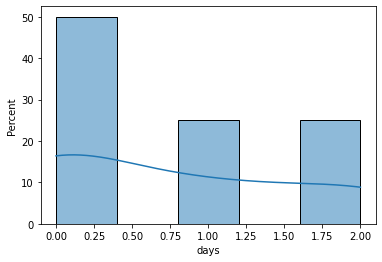

In [11]:
days = []
for i, row in NDE.iterrows():
    s = row['start']
    e = row['end']
    
    delta = e-s
    days.append(delta.days)

NDE['days'] = days
display(NDE)

NDE['days'].dropna(inplace=True)

x_axis = NDE['days'].drop_duplicates()

print(x_axis)
seaborn.histplot(NDE['days'], stat = 'percent', kde=True)

C:\Users\P72\AppData\Local\Temp/ipykernel_20876/3413700350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TForm['start'] = pd.to_datetime(TForm['start'], errors='ignore')
C:\Users\P72\AppData\Local\Temp/ipykernel_20876/3413700350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TForm['end'] = pd.to_datetime(TForm['end'], errors='ignore')
C:\Users\P72\AppData\Local\Temp/ipykernel_20876/3413700350.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,task,who,start,end,days
8,TFORM,Karelia Delgado,2022-03-21,2022-03-21,0.0
18,TFORM,Karelia Delgado,NaT,NaT,NaN
30,TFORM,Ricardo Franklin,2022-03-16,2022-03-17,1.0
82,TFORM,Ricardo Franklin,NaT,NaT,NaN
102,TFORM,Karelia Delgado,NaT,NaT,NaN
106,TFORM,Karelia Delgado,NaT,NaT,NaN
112,TFORM,Karelia Delgado,2022-03-14,2022-03-14,0.0


8     0.0
18    NaN
30    1.0
Name: days, dtype: float64


<AxesSubplot:xlabel='days', ylabel='Percent'>

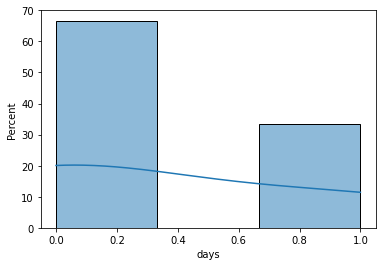

In [12]:
TForm = df[df.task == 'TFORM']

TForm['start'] = pd.to_datetime(TForm['start'], errors='ignore')
TForm['end'] = pd.to_datetime(TForm['end'], errors='ignore')

days = []
for i, row in TForm.iterrows():
    s = row['start']
    e = row['end']
    
    delta = e-s
    days.append(delta.days)

TForm['days'] = days
display(TForm)

x_axis = TForm['days'].drop_duplicates()

print(x_axis)
seaborn.histplot(TForm['days'], stat = 'percent', kde=True)